<a href="https://colab.research.google.com/github/lokedina1998/ds-project/blob/main/Customer_Conversion_Prediction_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 The Cirq Developers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/train.csv")

In [ ]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,NaN,5,may,261,1,unknown,no
1,44,technician,single,secondary,NaN,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,NaN,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,NaN,5,may,92,1,unknown,no
4,33,unknown,single,unknown,NaN,5,may,198,1,unknown,no
5,35,management,married,tertiary,NaN,5,may,139,1,unknown,no
6,28,management,single,tertiary,NaN,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,NaN,5,may,380,1,unknown,no
8,58,retired,married,primary,NaN,5,may,50,1,unknown,no
9,43,technician,single,secondary,NaN,5,may,55,1,unknown,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df.shape

(45211, 11)

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df["call_type"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [ ]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df["mon"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
df.call_type=df.call_type.map({"cellular":0,"telephone":1,"unknows":0})

In [ ]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df["call_type"].value_counts()

0.0    29285
1.0     2906
Name: call_type, dtype: int64

In [ ]:
df.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
df["y"].value_counts()[1]

5289

In [ ]:
df[df["prev_outcome"]=="success"].y.value_counts()[0]

978

In [ ]:
969/5255

0.18439581351094195

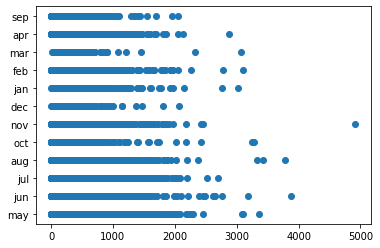

In [ ]:
#scatter plot
plt.scatter(df['dur'], df['mon']);

<AxesSubplot:xlabel='num_calls', ylabel='y'>

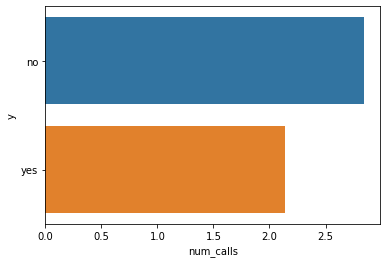

In [ ]:
sns.barplot(x='num_calls', y='y', data=df, ci=None)

<AxesSubplot:ylabel='job'>

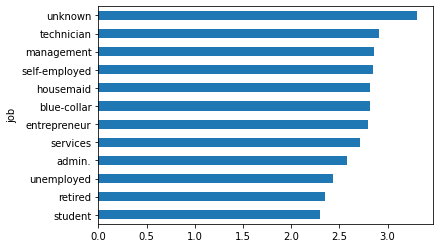

In [ ]:
df.groupby("job")["num_calls"].mean().sort_values().plot(kind="barh")

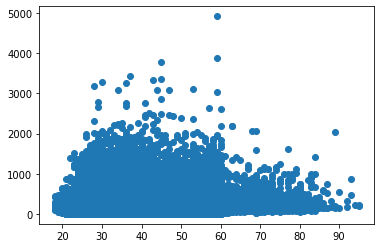

In [ ]:
plt.scatter(df['age'],df['dur'])

<AxesSubplot:xlabel='dur', ylabel='day'>

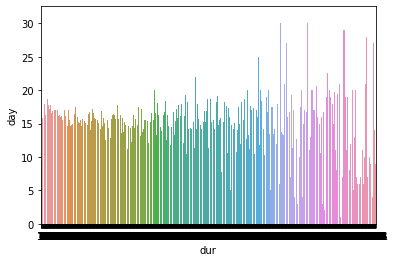

In [ ]:
sns.barplot(x='dur', y='day', data=df, ci=None)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

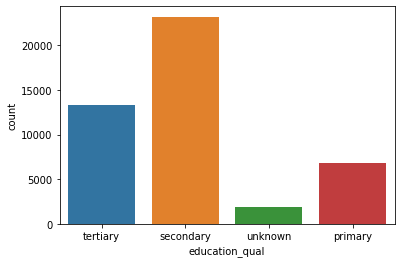

In [ ]:
sns.countplot(df['education_qual'])
df['education_qual'].value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dur', ylabel='count'>

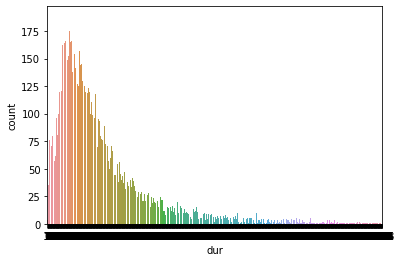

In [ ]:
sns.countplot(df['dur'])


<AxesSubplot:xlabel='education_qual', ylabel='age'>

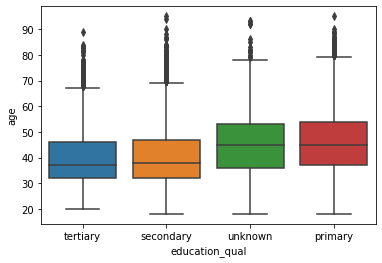

In [ ]:
sns.boxplot(x=df['education_qual'], y=df['age'])

In [ ]:
df.mean()


<ipython-input-152-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age           40.936210
call_type      0.090274
day           15.806419
dur          258.163080
num_calls      2.763841
dtype: float64

In [ ]:
df.std()


<ipython-input-154-ce97bb7eaef8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


age           10.618762
call_type      0.286578
day            8.322476
dur          257.527812
num_calls      3.098021
dtype: float64

# Notebook template

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/tutorials/google/colab"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/master/docs/tutorials/google/colab.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/master/docs/tutorials/google/colab.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/tutorials/google/colab.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

## Setup
Note: this notebook relies on unreleased Cirq features. If you want to try these features, make sure you install cirq via `pip install cirq --pre`.

In [ ]:
try:
    import cirq
    import cirq_google
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq-google --pre
    print("installed cirq.")
    import cirq
    import cirq_google

## Make a copy of this template

You will need to have access to Quantum Computing Service before running this colab.

This notebook can serve as a starter kit for you to run programs on Google's quantum hardware.  You can download it using the directions below, open it in colab (or Jupyter), and modify it to begin your experiments.

## How to download iPython notebooks from GitHub

You can retrieve iPython notebooks in the Cirq repository by
going to the [docs/ directory](https://github.com/quantumlib/Cirq/tree/master/docs).  For instance, this Colab template is found [here](https://github.com/quantumlib/Cirq/blob/master/docs/tutorials/google/colab.ipynb). Select the file that you would like to download and then click the *Raw* button in the upper-right part of the window:

<img src="https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/images/colab_github.png" alt="GitHub UI button to view raw file">

This will show the entire file contents.  Right-click and select *Save as* to save this file to your computer.  Make sure to save to a file with a `.ipynb` extension (you may need to select *All files* from the format dropdown instead of *text*). You can also get to this Colab's [raw content directly](https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/tutorials/google/colab.ipynb)

You can also retrieve the entire Cirq repository by running the following command in a terminal that has `git` installed:

```
git checkout https://github.com/quantumlib/Cirq.git
```

## How to open Google Colab

You can open a new Colab notebook from your Google Drive window or by visiting the [Colab site](https://colab.research.google.com/notebooks/intro.ipynb).  From the Colaboratory site, you can use the menu to upload an iPython notebook:

<img src="https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/images/colab_upload.png" alt="Google Colab's upload notebook entry in File menu.">

This will upload the ipynb file that you downloaded before.  You can now run all the commands, modify it to suit your goals, and share it with others.

### More Documentation Links

* [Quantum Engine concepts](/cirq/google/concepts.md)
* [Quantum Engine documentation](/cirq/google/engine.md)
* [Cirq documentation](https://quantumai.google/cirq)
* [Colab documentation](https://colab.research.google.com/notebooks/welcome.ipynb)


## Authenticate with Quantum Computing Service and install Cirq

For details of authentication and installation, please see [Get started with Quantum Computing Service](start.ipynb).

Note:  The below code will install the latest stable release of Cirq.  If you need the latest and greatest features and don't mind if a few things aren't quite working correctly, you can install the pre-release version of `cirq` using `pip install --pre cirq` instead of `pip install cirq` to get the most up-to-date features of Cirq.

1. Enter the Cloud project ID you'd like to use in the `project_id` field.
2. Then run the cell below (and go through the auth flow for access to the project id you entered).

<img src="https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/images/run-code-block.png" alt="Quantum Engine console">

In [ ]:
# The Google Cloud Project id to use.
project_id = '' #@param {type:"string"}
processor_id = "" #@param {type:"string"}

from cirq_google.engine.qcs_notebook import get_qcs_objects_for_notebook
# For real engine instances, delete 'virtual=True' below.
qcs_objects = get_qcs_objects_for_notebook(project_id, processor_id, virtual=True)
engine = qcs_objects.engine
processor_id = qcs_objects.processor_id

Available processors: ['rainbow', 'weber']
Using processor: rainbow


## Create an Engine variable

The following creates an engine variable which can be used to run programs under the project ID you entered above.

In [ ]:
from google.auth.exceptions import DefaultCredentialsError
from google.api_core.exceptions import PermissionDenied

# Create an Engine object to use, providing the project id and the args
try: 
    if qcs_objects.signed_in: # This line only needed for colab testing.
        engine = cirq_google.get_engine()
    print(f"Successful authentication using project {project_id}!")
    print('Available Processors: ')
    print(engine.list_processors())
    print(f'Using processor: {processor_id}')
    processor = engine.get_processor(processor_id)
except DefaultCredentialsError as err: 
    print("Could not authenticate to Google Quantum Computing Service.")
    print(" Tips: If you are using Colab: make sure the previous cell was executed successfully.")
    print("       If this notebook is not in Colab (e.g. Jupyter notebook), make sure gcloud is installed and `gcloud auth application-default login` was executed.")
    print()
    print("Error message:")
    print(err)
except PermissionDenied as err:
    print(f"While you are authenticated to Google Cloud it seems the project '{project_id}' does not exist or does not have the Quantum Engine API enabled.")
    print("Error message:")
    print(err)

Successful authentication using project !
Available Processors: 
[<cirq_google.engine.simulated_local_processor.SimulatedLocalProcessor object at 0x7f36eddbd1f0>, <cirq_google.engine.simulated_local_processor.SimulatedLocalProcessor object at 0x7f36edd6adc0>]
Using processor: rainbow


## Example

In [ ]:
# A simple example.
q = cirq.GridQubit(5, 2)
circuit = cirq.Circuit(cirq.X(q)**0.5, cirq.measure(q, key='m'))

job = processor.run_sweep(
    program=circuit,
    repetitions=1000)

results = [str(int(b)) for b in job.results()[0].measurements['m'][:, 0]]
print('Success!  Results:')
print(''.join(results))

Success!  Results:
001100011111111010111101010000010110011100111101000011000101000001111010101010111110000101001011110111010100000111010000000010110011000010111101001100011011011001000010011000111110011110110001110011001010101101110101101110000101001010000110101100111100100000111110000011100101100111001001000110011101001010000011100001101101001110100001001011010110001001001100010111011001011010000110010010101110001001001011011010001101011011011001110000101111000001000010100010111100111100110100111101011101110110000110001110000010001101100001010010011010101011001001011111000100010110111110110100110101110110011000101100000101001001010110111111101110001011001101010001000011010111011100000111010101111111001100000001101101111101010101011000101001010101110101000110111101010101011011110010101111001111011000111001011101000111001001010011110010101100011010101111000101010001000110001100100110011001011001101110001000010111000100111110000101111111101111011111111000110101101001101010011010100010010